heart disease using 8 machine learning algorithms :
1. Linear Regression
2. Logistic Regression
3. support vactor machine
4. naive-bayes
5. XGBoost
6. Random Forest Regression
7. Gradient Boosting Regresso
8. decision tree


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

In [2]:
heart =pd.read_csv('../input/heart-disease-uci/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# data info

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# finding missing value 

In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# map coorelation 

In [7]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
heart=heart.drop('fbs',axis=1)

# vizualisation 

In [9]:
matplotlib.rcParams['figure.figsize'] =[10,7]
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['font.family'] = 'sans-serif'

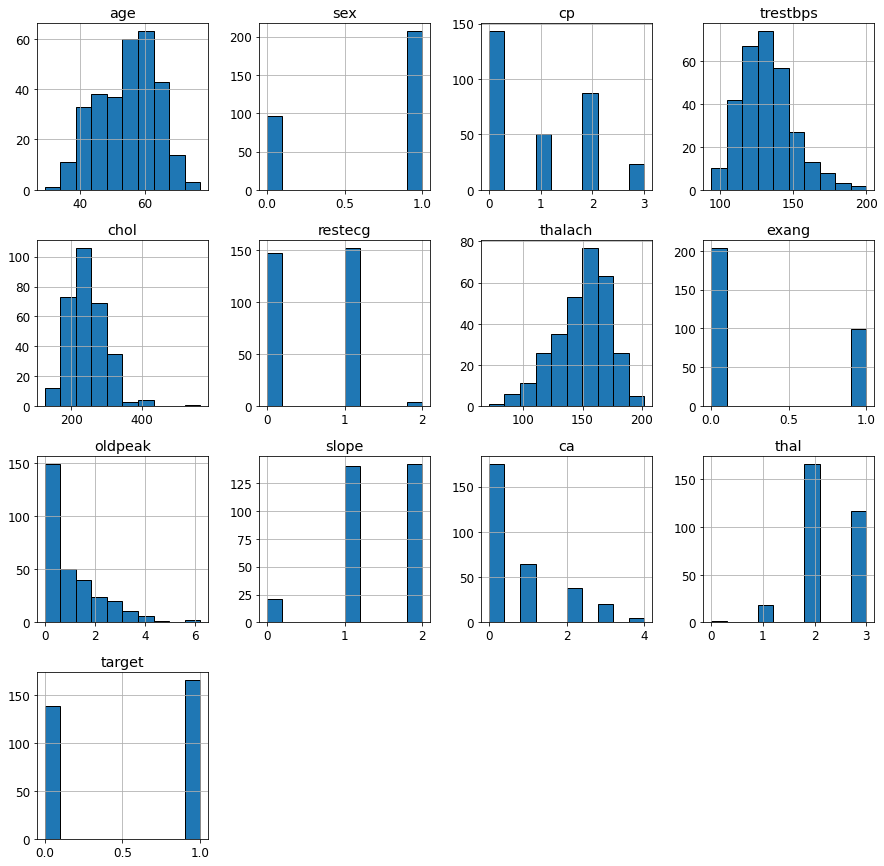

In [10]:
heart.hist(figsize=(15,15),edgecolor='black');

# A) target

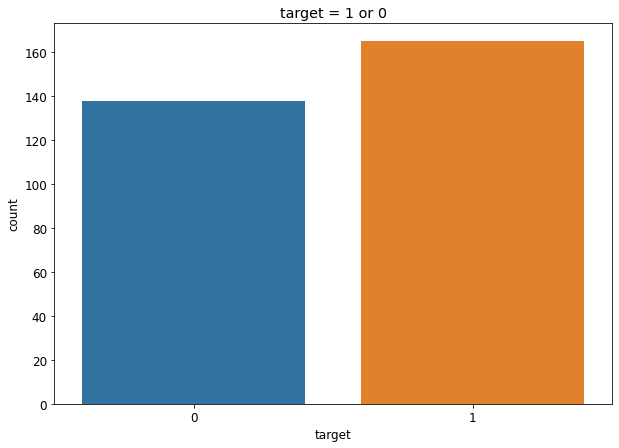

In [11]:
sns.countplot(x='target',data=heart)
plt.title('target = 1 or 0');

# A) gendre (male female)

Text(0.5, 0, 'sex => 1 = male; 0 = female')

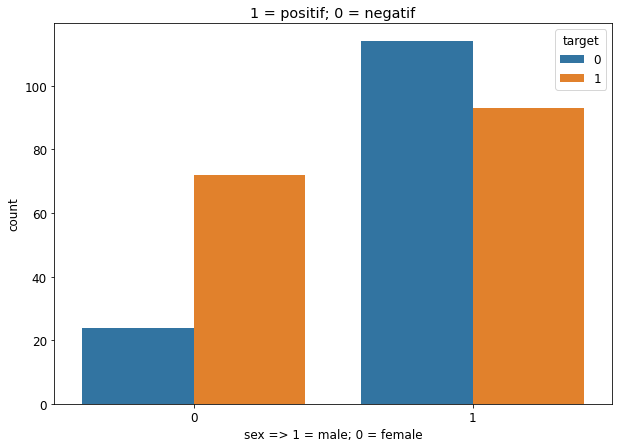

In [12]:
sns.countplot(x='sex',hue='target',data=heart)
plt.title('1 = positif; 0 = negatif')
plt.xlabel('sex => 1 = male; 0 = female')

# B ) Age

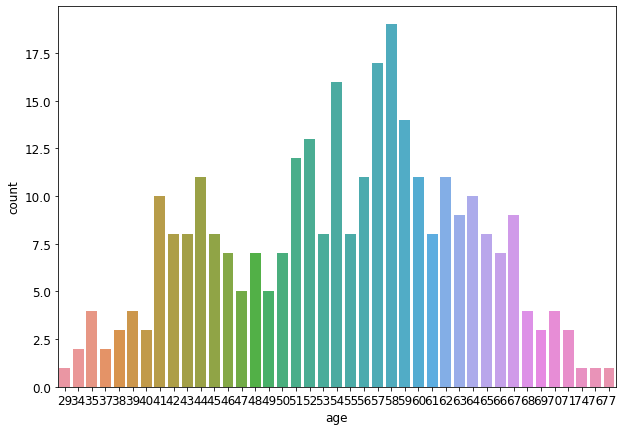

In [13]:
sns.countplot(x='age',data=heart);

# machine learning algo

# import library and split data 

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
x=heart.drop('target',axis=1)
y=heart.target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(242, 12) (242,) (61, 12) (61,)


# 1)	Linear Regression

In [18]:
from sklearn import linear_model

In [19]:
#Train the model
model = linear_model.LinearRegression()

In [20]:
#Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [21]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  24.3496522932226


# 2) logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
#Fit the model
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  78.68852459016394


# 3 ) Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
#Train the model
model = RandomForestRegressor(n_estimators=1000)

In [29]:
#Fit
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [30]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  29.761633752860405


# 4) Gradient Boosting Regresso 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
#Train the model
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [33]:
#Fit
GBR.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [34]:
print("Accuracy --> ", GBR.score(x_test, y_test)*100)

Accuracy -->  26.141585310035598


# 5) KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=20)

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [38]:
y_pred = knn.predict(x_test)

In [39]:
#Score/Accuracy
print("Accuracy --> ", knn.score(x_test, y_test)*100)

Accuracy -->  54.09836065573771


# 6) decision tree 

In [40]:
from sklearn import tree

In [41]:
t = tree.DecisionTreeClassifier()

In [42]:
t.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = t.predict(x_test)

In [44]:
#Score/Accuracy
print("Accuracy --> ", t.score(x_test, y_test)*100)

Accuracy -->  72.1311475409836


# 7) XGBoost

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [46]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [47]:
xg_reg.fit(x_train,y_train)

[19:30:58] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:58] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
preds = xg_reg.predict(x_test)

In [49]:
#Score/Accuracy
print("Accuracy --> ", xg_reg.score(x_test, y_test)*100)

Accuracy -->  16.392136969787796


### A) mean_squared_error

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.443149


### B) Accuracy score

In [51]:
#Score/Accuracy
print("Accuracy --> ", xg_reg.score(x_test, y_test)*100)

Accuracy -->  16.392136969787796


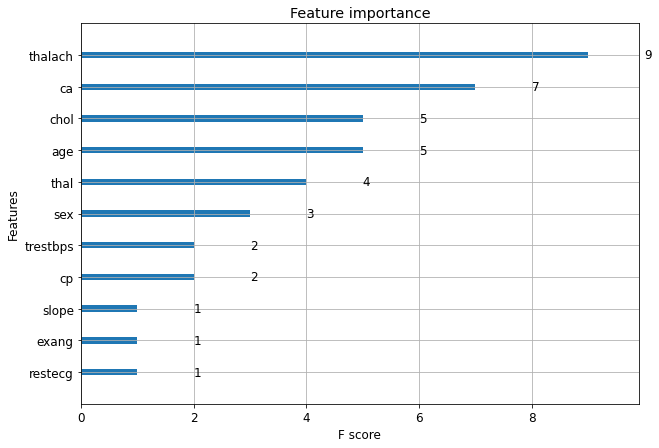

In [52]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# 8) naive-bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
model = GaussianNB()

In [55]:
model.fit(x_train,y_train)

GaussianNB()

In [56]:
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)

Accuracy -->  72.1311475409836


# 9) support vactor machine 

In [57]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [58]:
#Score/Accuracy
print("Accuracy --> ", clf.score(x_test, y_test)*100)

Accuracy -->  77.04918032786885
